Installations

In [ ]:
!pip install requests
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
from bs4 import BeautifulSoup


##input url of ground

In [ ]:
# url_link="https://stats.espncricinfo.com/ci/engine/records/team/match_results.html?class=2;id=848;type=ground"
# results=requests.get(url_link).text
# doc=BeautifulSoup(results,"html.parser")
#UAE GROUND


In [ ]:
# url_link="https://stats.espncricinfo.com/ci/engine/records/team/match_results.html?class=2;id=292;type=ground"
# results=requests.get(url_link).text
# doc=BeautifulSoup(results,"html.parser")

#EDEN GARDENS


In [ ]:
# url_link="https://stats.espncricinfo.com/ci/engine/records/team/match_results.html?class=2;id=1896;type=ground"
# results=requests.get(url_link).text
# doc=BeautifulSoup(results,"html.parser")


In [ ]:
# url_link="https://stats.espncricinfo.com/ci/engine/records/team/match_results.html?class=2;id=713;type=ground"
# results=requests.get(url_link).text
# doc=BeautifulSoup(results,"html.parser")

#Wankhade


In [ ]:
url_link="https://stats.espncricinfo.com/ci/engine/records/team/match_results.html?class=3;id=2439;type=ground"
results=requests.get(url_link).text
doc=BeautifulSoup(results,"html.parser")

#Dubai International Stadium

##Scorecards of all matches played in the ground with winners list

In [ ]:
res=doc.find_all(class_="data1")
scorecards=[]
winnerList=[]
logistic_wl = []
team_num=[]
for i in range(len(res)):
  if(res[i].find_all('td')[2].text != 'abandoned' and res[i].find_all('td')[2].text != 'no result'):
    scorecards.append(res[i].find_all('td')[-1].find('a',href=True)['href'])
    winnerList.append(res[i].find_all('td')[2].text)
    logistic_wl.append(1)
    logistic_wl.append(0)


##Finding the number of the team that won


In [ ]:
res=doc.find_all(class_="data1")
scorecards=[]
winnerList=[]
logistic_wl = []
team_num1=[]
list_res=[]
for i in range(len(res)):
  if(res[i].find_all('td')[2].text != 'abandoned' and res[i].find_all('td')[2].text != 'no result'):
    scorecards.append(res[i].find_all('td')[-1].find('a',href=True)['href'])
    winnerList.append(res[i].find_all('td')[2].text)
    list_res.append(res[i].find_all('td')[3].text)
    logistic_wl.append(1)
    logistic_wl.append(0)
for i in list_res:
  if i.find("wicket")!=-1:
    team_num1.append(2)
  else:
    team_num1.append(1)
# team_num1

In [ ]:
len(scorecards)

86

<!-- ##Getting player roles in that particular match  -->

##Getting overs and runrate of each match


In [ ]:
team_stat = []
overs_rr = []
for i in range(len(scorecards)):
  url_link_sc="https://stats.espncricinfo.com" + scorecards[i]
  results_sc=requests.get(url_link_sc).text
  doc_sc=BeautifulSoup(results_sc,"html.parser")
  res_sc=doc_sc.find_all(class_="ds-rounded-lg ds-mt-2")
  score = doc_sc.find_all(class_="ds-text-compact-m ds-text-typo ds-text-right ds-whitespace-nowrap")
  over_run=doc_sc.find_all(class_="ds-font-bold ds-bg-fill-content-alternate ds-text-tight-m ds-min-w-max ds-hidden")

  if(len(score)==2):
    for i in range(2):
      k = score[i].find('strong').text
      team_stat.append(k)
    for i in range(2):
      over = res_sc[i].find_all('tbody')
      if 'Ov' in over[0].find_all('tr')[-3].find_all('td')[1].text:
        overs_rr.append(over[0].find_all('tr')[-3].find_all('td')[1].text)
      else:
        overs_rr.append(over[0].find_all('tr')[-2].find_all('td')[1].text)
    bowlers_sc = []
    losing = 0
    for k in range(len(res_sc)):
      if winnerList[i] != res_sc[k].find(class_="ds-text-title-xs ds-font-bold ds-capitalize").text:
        bowlers_sc = res_sc[k]
        losing = k
    res_sc.pop(losing)


In [ ]:
overs_dup=[]
overs_dup=overs_rr
# overs_dup

In [ ]:
overs_rr=overs_dup
# overs_dup

In [ ]:
overs_rr=overs_dup
overs_rr1=[]
for i in range(len(overs_rr)):
  overs_rr1.append(overs_rr[i].split('Ov\xa0'))
print(overs_rr1)


[['19.5 ', '(RR: 5.44)'], ['16.2 ', '(RR: 6.67)'], ['20 ', '(RR: 8.05)'], ['18.3 ', '(RR: 6.05)'], ['20 ', '(RR: 7.65, 82 Mins)'], ['20 ', '(RR: 7.30, 87 Mins)'], ['20 ', '(RR: 6.95, 88 Mins)'], ['19.2 ', '(RR: 6.51, 86 Mins)'], ['20 ', '(RR: 7.10, 88 Mins)'], ['19.1 ', '(RR: 7.61, 76 Mins)'], ['20 ', '(RR: 6.90)'], ['14.5 ', '(RR: 9.50, 54 Mins)'], ['20 ', '(RR: 6.80)'], ['18.3 ', '(RR: 5.35)'], ['20 ', '(RR: 6.40)'], ['18.5 ', '(RR: 7.00)'], ['20 ', '(RR: 7.55)'], ['15.3 ', '(RR: 5.54)'], ['20 ', '(RR: 7.10)'], ['17.3 ', '(RR: 8.40)'], ['20 ', '(RR: 6.45)'], ['18.3 ', '(RR: 7.02)'], ['20 ', '(RR: 7.40)'], ['19 ', '(RR: 7.84)'], ['20 ', '(RR: 7.20, 96 Mins)'], ['20 ', '(RR: 6.80)'], ['20 ', '(RR: 7.50)'], ['18.2 ', '(RR: 6.10)'], ['20 ', '(RR: 6.75)'], ['16.4 ', '(RR: 5.58)'], ['19 ', '(RR: 3.73)'], ['7.2 ', '(RR: 9.81)'], ['20 ', '(RR: 7.45)'], ['19.4 ', '(RR: 7.62)'], ['20 ', '(RR: 7.95)'], ['20 ', '(RR: 7.10)'], ['20 ', '(RR: 5.30)'], ['9.3 ', '(RR: 11.47)'], ['20 ', '(RR: 5.70)'],

##Finding Economy, Overs Bowled & Batted,Balls Bowled & batted of Winning team

In [ ]:
import math
winner_eco=[]
winner_overs_bowled=[]
winner_overs_batted=[]
winner_balls_bowled=[]
winner_balls_batted=[]
i=0
while(i<len(overs_rr1)):
  if(team_num1[int(i/2)]%2==0):
    winner_eco.append(overs_rr1[i][1])
    winner_overs_bowled.append(overs_rr1[i][0])
    winner_overs_batted.append(overs_rr1[i+1][0])
  else:
    winner_eco.append(overs_rr1[i+1][1])
    winner_overs_bowled.append(overs_rr1[i+1][0])
    winner_overs_batted.append(overs_rr1[i][0])
  i=i+2
for i in range(len(winner_eco)):
  winner_eco[i]=float(winner_eco[i][5:9])
  winner_overs_bowled[i]=float(winner_overs_bowled[i])
  winner_overs_batted[i]=float(winner_overs_batted[i])
  if((winner_overs_bowled[i]*10)%10==0):
    winner_balls_bowled.append(int(winner_overs_bowled[i]*6))
  else:
    winner_balls_bowled.append(int(math.floor(winner_overs_bowled[i])*6 + (winner_overs_bowled[i]*10)%10))
  if((winner_overs_batted[i]*10)%10==0):
    winner_balls_batted.append(int(winner_overs_batted[i]*6))
  else:
    winner_balls_batted.append(int(math.floor(winner_overs_batted[i])*6 + (winner_overs_batted[i]*10)%10))


# winner_balls_batted


##Finding Average, Scores,Bowling SR,Batting SR, Wickets Taken for winning teams


In [ ]:
for i in range(len(team_stat)):
  if '/' not in team_stat[i]:
    team_stat[i] = team_stat[i] + '/10'
winner_averages=[]
winner_scores=[]
winner_strikerates=[]
winner_bowling_SR=[]
winner_wkts_taken=[]
i=0
temp=[]
temp1=[]
while(i<len(team_stat)):
  temp=team_stat[i+1].split('/')
  temp1=team_stat[i].split('/')
  if(team_num1[int(i/2)]%2==0):
    winner_wkts_taken.append(int(temp1[1]))
    winner_scores.append(float(int(temp[0])))
    if(int(temp[1]!=10)):
      winner_averages.append(float(int(temp[0])/(int(temp[1])+2)))
    else:
      winner_averages.append(float(int(temp[0])/(11)))
  else:
    winner_wkts_taken.append(int(temp[1]))
    winner_scores.append(float(int(temp1[0])))
    if(int(temp[1]!=10)):
      winner_averages.append(float(int(temp1[0])/(int(temp1[1])+2)))
    else:
      winner_averages.append(float(int(temp1[0])/(11)))
  i=i+2
for i in range(len(winner_scores)):
  winner_strikerates.append(winner_scores[i]*100/winner_balls_batted[i])
  if(winner_wkts_taken[i]!=0):
    winner_bowling_SR.append(winner_balls_bowled[i]/winner_wkts_taken[i])
  else:
    winner_bowling_SR.append(300)

# winner_bowling_SR

##Best Fit line between Winner Averages and Strikerates




[[1.02416491]]
[111.37768652]


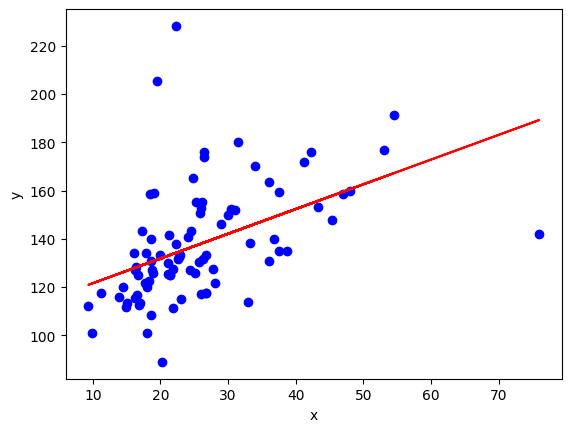

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Create the lists
x = winner_averages
y = winner_strikerates
x1 = np.array(x)
y1 = np.array(y)
# Reshape the lists into 2D arrays
x1 = x1.reshape(-1, 1)
y1 = y1.reshape(-1, 1)

# Create the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x1, y1)
x_new=[[q] for q  in x]

y_new = model.predict(x_new)
plt.scatter(x, y, color='blue')

# Plot the regression line
plt.plot(x_new, y_new, color='red')

# Add axis labels
plt.xlabel('x')
plt.ylabel('y')
# Print the coefficients
print(model.coef_)
print(model.intercept_)


#Scatter plot of Batting Parameters


[[1.02416491]]
[111.37768652]


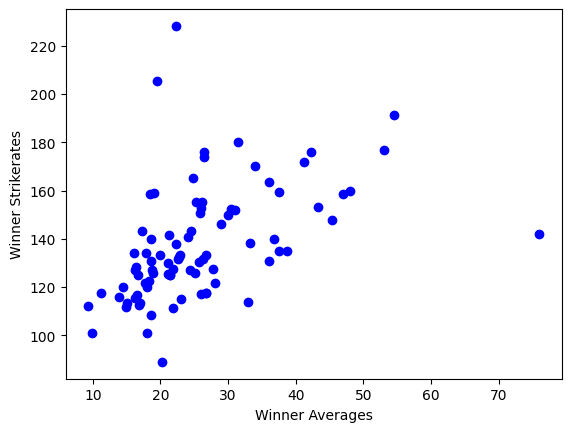

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Create the lists
x = winner_averages
y = winner_strikerates
x1 = np.array(x)
y1 = np.array(y)
# Reshape the lists into 2D arrays
x1 = x1.reshape(-1, 1)
y1 = y1.reshape(-1, 1)

# Create the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x1, y1)
x_new=[[q] for q  in x]

y_new = model.predict(x_new)
plt.scatter(x, y, color='blue')

# Plot the regression line
# plt.plot(x_new, y_new, color='red')

# Add axis labels
plt.xlabel('Winner Averages')
plt.ylabel('Winner Strikerates')
# Print the coefficients
print(model.coef_)
print(model.intercept_)


##Elbow Method


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

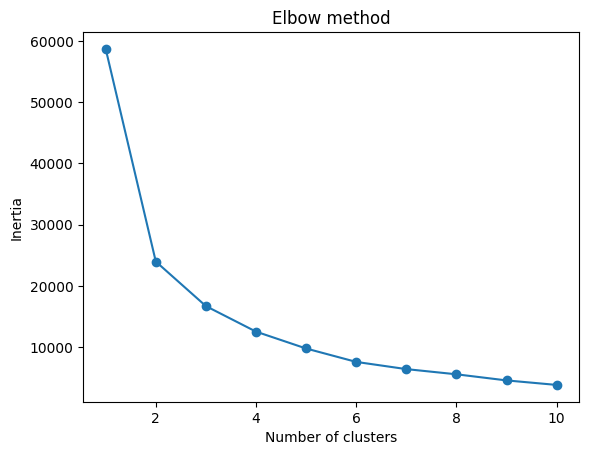

In [ ]:
from sklearn.cluster import KMeans

data = list(zip(winner_averages,winner_strikerates))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Function to Find number of Clusters satisfy threshold

In [ ]:
def find_cluster_num(winner_averages,winner_strikerates,threshold):
  d=np.column_stack((winner_averages,winner_strikerates))
  for i in range(2,len(winner_strikerates)):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(d)
    cluster_assignments = kmeans.predict(d)
    for j in range(i):
      if(len(d[cluster_assignments == j])<=threshold):
        return i

##Removing Outlayers

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

4 5
0
1
2
3


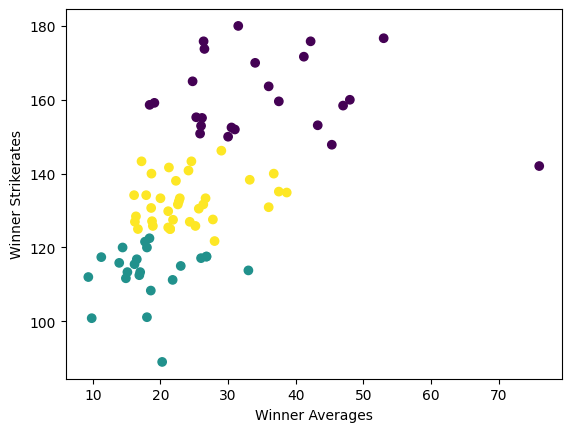

In [ ]:
import math
d=np.column_stack((winner_averages,winner_strikerates))
threshold=len(winner_averages)/20
num_clusters=find_cluster_num(winner_averages,winner_strikerates,math.ceil(threshold))
print(num_clusters,math.ceil(threshold))
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(d)
cluster_assignments = kmeans.predict(d)
arr=[]
for i in range(num_clusters):
  arr.append(d[cluster_assignments == i])

arr1=[]
count=0
for i in range(len(arr)):
  if(len(arr[i])>math.ceil(threshold)):
    print(count)
    count+=1
    arr1.append(arr[i])
print(len(arr1))
winner_averages1=[]
winner_strikerates1=[]
for i in range(len(arr1)):
  for j in range(len(arr1[i])):
    winner_strikerates1.append(arr1[i][j][1])
    winner_averages1.append(arr1[i][j][0])
d=np.column_stack((winner_averages1,winner_strikerates1))
kmeans = KMeans(n_clusters=count)
kmeans.fit(d)
plt.xlabel('Winner Averages')
plt.ylabel('Winner Strikerates')
plt.scatter(winner_averages1, winner_strikerates1, c=kmeans.labels_)
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


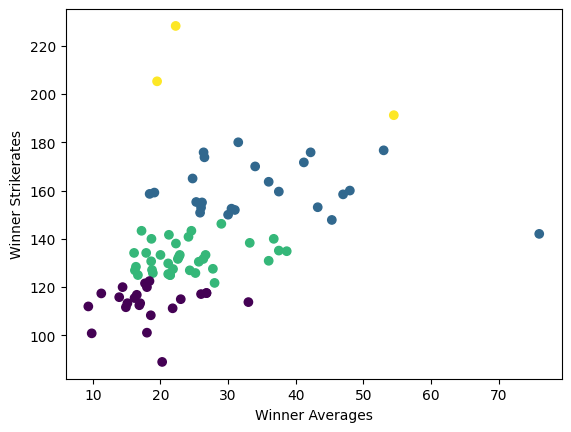

In [ ]:
d=np.column_stack((winner_averages,winner_strikerates))
kmeans = KMeans(n_clusters=4)
kmeans.fit(d)
plt.xlabel('Winner Averages')
plt.ylabel('Winner Strikerates')
plt.scatter(winner_averages, winner_strikerates, c=kmeans.labels_)
plt.show()


##Best Fit line between Winner Averages and Strikerates after Outlayer removal

regression line: 1.0321324226197766x + 108.86047656320183


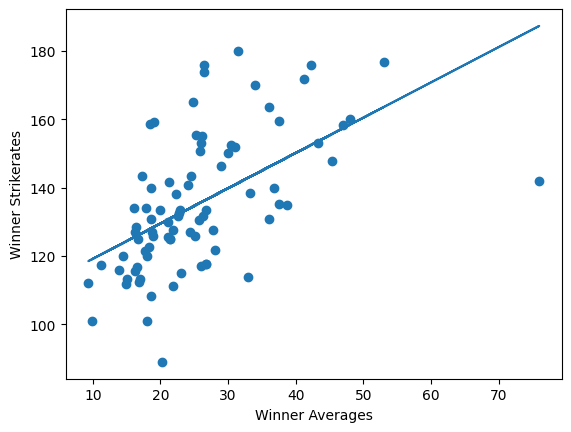

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def best_fit_slope_and_intercept(xs,ys):
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)*np.mean(xs)) - np.mean(xs*xs)))
    b = np.mean(ys) - m*np.mean(xs)
    return m, b

# Generate some data points
xs = np.array(winner_averages1, dtype=np.float64)
ys = np.array(winner_strikerates1, dtype=np.float64)

m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]
print(f"regression line: {m}x + {b}")
plt.xlabel('Winner Averages')
plt.ylabel('Winner Strikerates')

# Plot the data points and the best fit line
plt.scatter(xs,ys)
plt.plot(xs, regression_line)
plt.show()
x_slope=m

regression line: 1.0321324226197766x + 108.86047656320183


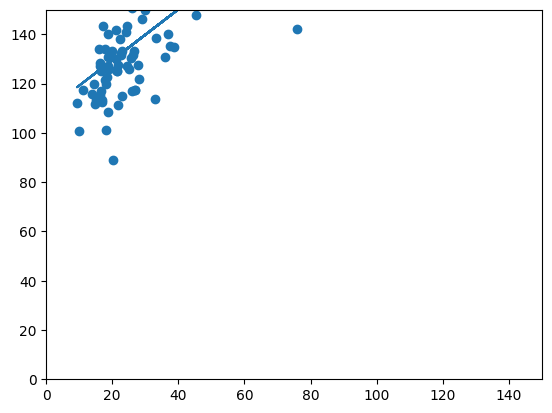

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def best_fit_slope_and_intercept(xs,ys):
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)*np.mean(xs)) - np.mean(xs*xs)))
    b = np.mean(ys) - m*np.mean(xs)
    return m, b

# Generate some data points
xs = np.array(winner_averages1, dtype=np.float64)
ys = np.array(winner_strikerates1, dtype=np.float64)

m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]
print(f"regression line: {m}x + {b}")

# Plot the data points and the best fit line
plt.scatter(xs,ys)
plt.plot(xs, regression_line)
plt.xlim(0,150)
plt.ylim(0,150)

plt.show()

x_slope=m
bat_intercept=b

[[0.13928036]]
[4.48611421]


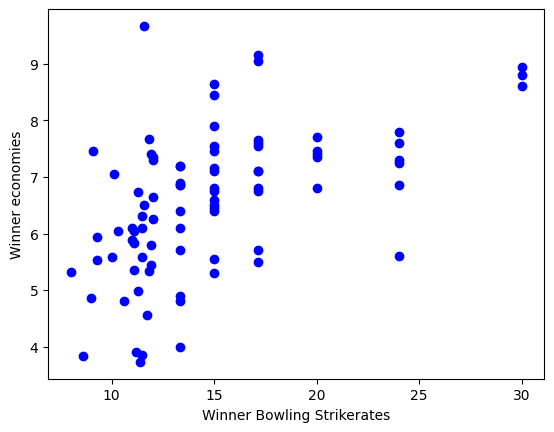

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Create the lists
x = winner_bowling_SR
y = winner_eco
x1 = np.array(x)
y1 = np.array(y)
# Reshape the lists into 2D arrays
x1 = x1.reshape(-1, 1)
y1 = y1.reshape(-1, 1)

# Create the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x1, y1)
x_new=[[q] for q  in x]

y_new = model.predict(x_new)
plt.scatter(x, y, color='blue')

# Plot the regression line
# plt.plot(x_new, y_new, color='red')

# Add axis labels
plt.xlabel('Winner Bowling Strikerates')
plt.ylabel('Winner economies')
# Print the coefficients
print(model.coef_)
print(model.intercept_)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

4 5


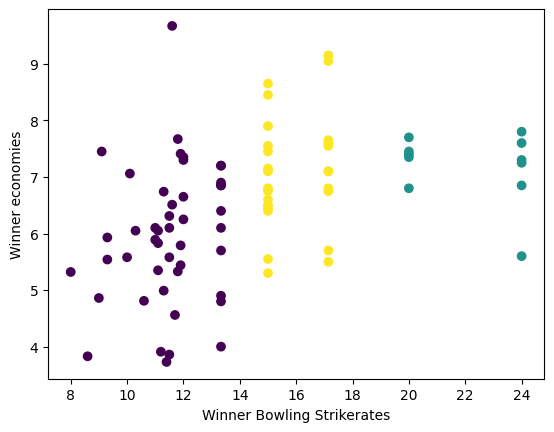

In [ ]:
import math
d=np.column_stack((winner_bowling_SR,winner_eco))
threshold=len(winner_bowling_SR)/20
num_clusters=find_cluster_num(winner_bowling_SR,winner_eco,math.ceil(threshold))
print(num_clusters,math.ceil(threshold))
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(d)
cluster_assignments = kmeans.predict(d)
arr=[]
for i in range(num_clusters):
  arr.append(d[cluster_assignments == i])

arr1=[]
count=0
for i in range(len(arr)):
  if(len(arr[i])>threshold):
    count+=1
    arr1.append(arr[i])

winner_bowling_SR1=[]
winner_eco1=[]
for i in range(len(arr1)):
  for j in range(len(arr1[i])):
    winner_eco1.append(arr1[i][j][1])
    winner_bowling_SR1.append(arr1[i][j][0])
d=np.column_stack((winner_bowling_SR1,winner_eco1))
kmeans = KMeans(n_clusters=count)
kmeans.fit(d)
plt.xlabel('Winner Bowling Strikerates')
plt.ylabel('Winner economies')
plt.scatter(winner_bowling_SR1, winner_eco1, c=kmeans.labels_)
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


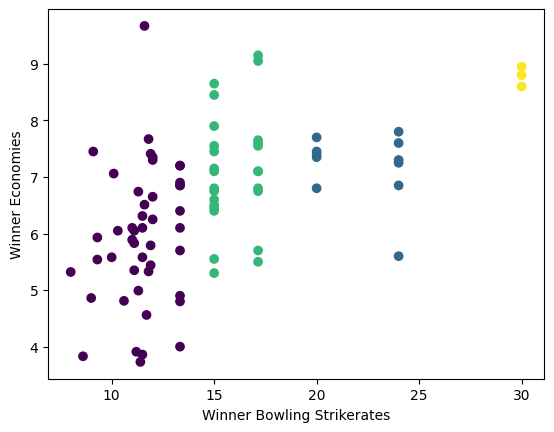

In [ ]:
d=np.column_stack((winner_bowling_SR,winner_eco))
kmeans = KMeans(n_clusters=4)
kmeans.fit(d)
plt.xlabel('Winner Bowling Strikerates')
plt.ylabel('Winner Economies')
plt.scatter(winner_bowling_SR, winner_eco, c=kmeans.labels_)
plt.show()


##Best Fit line between Winner Bowling SR and Winner Economy


regression line: 0.13487115918890194x + 4.544889420024265


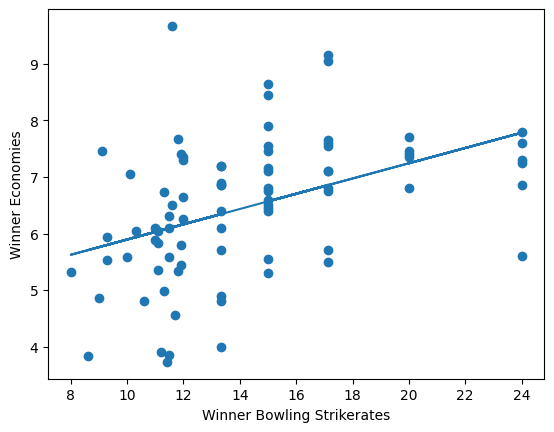

In [ ]:
# Generate some data points
xs = np.array(winner_bowling_SR1, dtype=np.float64)
ys = np.array(winner_eco1, dtype=np.float64)

m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]
print(f"regression line: {m}x + {b}")

# Plot the data points and the best fit line
plt.xlabel("Winner Bowling Strikerates")
plt.ylabel("Winner Economies")
plt.scatter(xs,ys)
plt.plot(xs, regression_line)
plt.show()
y_slope=m
bowl_intercept=b

##Bowling and Batting Values Calculation on a particular Ground

In [ ]:

ground_batting_values=[]
ground_bowling_values=[]
for i in range(len(winner_averages)):
  ground_batting_values.append(winner_averages[i] + ((winner_strikerates[i]-bat_intercept)/x_slope))
  # ground_batting_values.append(winner_averages[i]*x_slope + winner_strikerates[i])
  # ground_bowling_values.append(y_slope*winner_bowling_SR[i]+winner_eco[i])
  # ground_bowling_values.append(winner_eco[i]+y_slope*winner_eco[i])
  ground_bowling_values.append(winner_bowling_SR[i]+((winner_eco[i]-bowl_intercept)/y_slope))
print(len(ground_batting_values),len(ground_bowling_values))


86 86


##Best Fit Line between Bowling and Batting Values

regression line: 0.0665541897768667x + 26.163976770281717


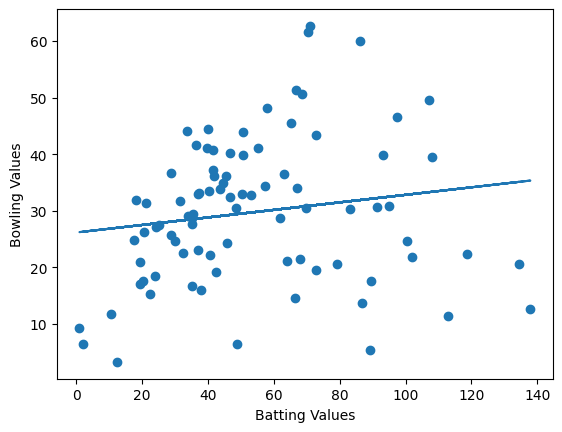

In [ ]:
xs = np.array(ground_batting_values, dtype=np.float64)
ys = np.array(ground_bowling_values, dtype=np.float64)

m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]
print(f"regression line: {m}x + {b}")

plt.scatter(xs,ys)
plt.plot(xs, regression_line)
plt.xlabel("Batting Values")
plt.ylabel("Bowling Values")
plt.show()
slope_fin=m
bat_bowl_intercept=b




##Example of Srilanka Cricket team

In [ ]:
players=["Avishka Fernando","Nuwanidu Fernando","Kusal Mendis","Ashen Bandara","Charit Asalanka","Dasun Shanaka","Wanindu Hasaranga","Chamika Karunaratne","Kasun Rajitha","Lahiru Kumara","Dunith Wellalage","Sadeera Samarawickrama","Pramod Madushan","Pathum Nissanka","Dilshan Madushanka","Maheesh Theekshana","Dhananjaya de Silva","Jeffrey Vandersay"]
averages=[39.9,35.5,28.6,23.8,37.3,21.9,20.9,17.4,3.10,3.21,18.17,31.2,5.96,29.7,-1,4.53,27.13,10.46]
strikerates=[95.01,85.63,85.02,78.88,83.70,92.71,111.37,88.87,50.87,51.26,76.48,86.10,53.16,80.83,0,42.44,82.78,66.46]
economy=[100,6.71,100,5.04,4.48,5.38,4.72,5.43,6.29,5.74,4.94,100,5.19,100,7.21,4.18,4.91,4.86]
bowlingSR=[0,42.0,0,27.1,33.8,32.5,33.1,25.8,33.7,27.5,30.8,0,29.2,0,84.0,39.4,40.2,29.5]
balls_bowled=[0,42,26,326,1082,1885,3311,2356,2162,1766,833,0,1811,18,0,1222,2897,3483]
matches=[64,25,122,59,72,136,78,79,52,45,21,99,50,57,2,25,120,78	]

balls_faced=[2479,954,4014,1591,2854,2675,1319,1214,171,119,404,3411,348,2179,84,139,3770,677	]
batting_threshold=10
bowling_threshold=10


In [ ]:
players=["Imam-ul-Haq","Shan Masood Khan","Haris Sohail","Shoaib Malik","Umar Akmal","Mohammad Rizwan","Faheem Ashraf","Imad Wasim","Mohammad Amir","Yasir Shah","Mohammad Abbas","Junaid Khan","Usman Shinwari","Abid Ali","Saad Ali","Mohammad Hasnain"]
averages=[44.71,56.46,43.41,38.54,35.34,46.92,15.12,36.93,18.77,20.02,7.61,8.33,7.45,39.42,44.55,12.71]
strikerates=[80.03,82.81,87.63,81.90,95.12,88.77,83.16,99.10,80.35,85.23,53.10,53.54,64.06,81.62,86.04,132.83]
economy=[7.49,4.25,5.66,4.55,5.31,100,5.20,4.74,4.63,4.85,4.88,5.30,5.10,3.63,3.80,5.29	]
bowlingSR=[0,12.0,65.3,43.6,57.0,100,34.7,45.4,34.5,39.8,35.9,34.9,27.6,38.00,30.0,29.6	]
balls_bowled=[28,24,850,13498,114,0,3198,5902,4244,5980,2693,7238,2349,38,30,1274]
matches=[88,103,88,405,224,151,75,124,84,114,55,151,51,102,74,26	]

balls_faced=[4582,5727,3567,12000,6836,5497,909,2683,514,679,258,252,128,4540,2537,67			]
batting_threshold=8
bowling_threshold=10


In [ ]:
players=["Ishan Kishan","Hardik pandya","Shubman Gill","Virat Kohli","Suryakumar Yadav","KL Rahul","Ravindra Jadeja","Washington Sundar","Mohammed Shami","Mohammed Siraj","Yuzvendra Chahal","Shardul Thakur","Axar Patel","Kuldeep Yadav","Umran Malik","Jaydev Unadkat"]
averages=[38.20,31.93,54.12,56.55,35.34,43.59,32.67,22.64,9.02,8.25,11.11,18.64,30.63,11.76,16.00,10.93]
strikerates=[94.00,106.92,95.26,93.78,104.01,80.24,87.70,81.20,92.03,72.05,56.60,112.01,98.50,64.30,94.11,76.32]
economy=[10,5.42,10,6.17,5.27,12.00,4.78,4.65,5.49,5.03,4.92,5.72,4.28,5.07,6.43,4.76]
bowlingSR=[0,42.4,0,176.2,71.6,21.0,43.9,41.3,27.4,26.1,32.1,29.1,40.8,31.6,32.0,36.5]
balls_bowled=[0,3562,6,705,430,21,10986,2397,5936,3106,6306,4437,7360,4780,480,6134]
matches=[90,92,76,305,122,103,224,65,118,66,129,96,144,91,11,116	]

balls_faced=[3251,1732,3693,15196,3160,4835,3986,1032,402,229,530,699,2270,311,17,659	]
batting_threshold=8
bowling_threshold=10


In [ ]:
#IPL#
players=["Shreyas Iyer","Ravichandran Ashwin","Avesh Khan","Alex Carey","Tushar Deshpande","Shikhar Dhawan","Praveen Dubey","Shimron Hetmyer","Lalit Yadav","Sandeep Lamichhane","Anrich Nortje","Rishabh Pant","Harshal Patel","Axar Patel","Keemo Paul","Kagiso Rabada","Ajinkya Rahane","Daniel Sams","Mohit Sharma","Prithvi Shaw","Marcus Stoinis"]
averages=[32.00,15.18,5.90,28.32,5.83,32.78,14.00,26.38,31.41,7.05,6.78,31.32,16.74,22.19,16.41,11.61,28.77,15.21,8.30,26.22,30.34]
strikerates=[130.29,119.36,115.68,127.84,116.66,124.77,102.43,131.81,137.61,86.95,93.13,144.84,146.94,133.72,123.56,106.09,119.51,149.54,105.73,151.57,136.50	]
economy=[9.91,6.97,8.12,10,8.37,8.25,7.13,10,7.00,6.85,7.30,10,8.13,6.99,9.27,7.98,5.00,8.79,8.25,10,9.03]
bowlingSR=[49.0,22.2,16.8,100,15.0,12.0,18.7,100,24.0,15.5,15.9,100,17.2,24.0,19.2,16.9,6.0,17.2,21.3,100,18.8]
balls_bowled=[49,6414,1686,0,951,48,375,0,962,3001,2102,0,3267,4283,1442,3787,6,2453,2630,0,1808]
matches=[197,297,79,107,44,319,22,157,67,136,97,179,158,207,101,172,227,123,131,93,220]
balls_faced=[4004,878,51,1839,30,7463,123,2342,662,138,102,3006,752,1610,611,394,4719,763,157,1592,3312	]
batting_threshold=8
bowling_threshold=10


In [ ]:
batting_threshold=6
bowling_threshold=8
for i in range(len(players)):

  if((balls_faced[i]/matches[i])>=batting_threshold and (balls_bowled[i]/matches[i])>=bowling_threshold):
    print("Allrounder",players[i])
  elif((balls_faced[i]/matches[i])<batting_threshold):
    print("Bowler",players[i])
  else:
    print("Batter",players[i])

Batter Shreyas Iyer
Bowler Ravichandran Ashwin
Bowler Avesh Khan
Batter Alex Carey
Bowler Tushar Deshpande
Batter Shikhar Dhawan
Bowler Praveen Dubey
Batter Shimron Hetmyer
Allrounder Lalit Yadav
Bowler Sandeep Lamichhane
Bowler Anrich Nortje
Batter Rishabh Pant
Bowler Harshal Patel
Allrounder Axar Patel
Allrounder Keemo Paul
Bowler Kagiso Rabada
Batter Ajinkya Rahane
Allrounder Daniel Sams
Bowler Mohit Sharma
Batter Prithvi Shaw
Allrounder Marcus Stoinis


In [ ]:
print('Player Name', "       Batting Value", "           Bowling Value")
print()
batting_vals=[]
bowling_vals=[]
batter_bowler_allrounder=[]
wicket_keeper=[0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0]
nationality=[0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,1,0,1,0,0,1]
for i in range(len(averages)):
  batting_vals.append(averages[i] + (strikerates[i]-bat_intercept)/x_slope)
  bowling_vals.append(bowlingSR[i]+((economy[i]-bowl_intercept)/y_slope))

  if((balls_faced[i]/matches[i])>=batting_threshold and (balls_bowled[i]/matches[i])>=bowling_threshold):
    batter_bowler_allrounder.append(1)
  elif((balls_faced[i]/matches[i])<batting_threshold):
    batter_bowler_allrounder.append(2)
  else:
    batter_bowler_allrounder.append(0)
  if(batter_bowler_allrounder[i]==0):
      print(players[i],"      ", batting_vals[i],"     ", '    -' )
  else:
    print(players[i],"     ", batting_vals[i],"      ", bowling_vals[i])


Player Name        Batting Value            Bowling Value

Shreyas Iyer        52.76237793441793           -
Ravichandran Ashwin       25.352651499647784        40.18094266083307
Avesh Khan       12.507217530759032        43.30759881857617
Alex Carey        46.708651514913186           -
Tushar Deshpande       13.38670809856092        43.36121972243336
Shikhar Dhawan        48.19422698108479           -
Praveen Dubey       7.769717506906843        37.86726003930168
Shimron Hetmyer        48.6150571824372           -
Lalit Yadav       59.26449115514232        42.20337716929593
Sandeep Lamichhane       -14.178357992657833        32.59120462698162
Anrich Nortje       -8.460754207947911        36.32772225392457
Rishabh Pant        66.17940626249714           -
Harshal Patel       53.6340289077869        43.78174365473046
Axar Patel       46.275594921724576        42.12923233314165
Keemo Paul       30.651896790227347        54.234254976319264
Kagiso Rabada       8.925774117269029        42.

In [ ]:
dict_players=[]

for i in range(len(averages)):
  temp={}
  temp["Name"]=players[i]
  temp["Batting Value"]=batting_vals[i]
  temp["Bowling Value"]=bowling_vals[i]
  temp['matches']=matches[i]
  if(batter_bowler_allrounder[i]==0):
    temp["Batter"]=True
    temp["Bowler"]=False
  elif(batter_bowler_allrounder[i]==1):
    temp["Batter"]=True
    temp["Bowler"]=True
  else:
    temp["Batter"]=False
    temp["Bowler"]=True
  if(wicket_keeper[i]==0):
    temp["Wicket Keeper"]=False
  else:
    temp["Wicket Keeper"]=True
  if(nationality[i]==0):
    temp["Indian"]=True
  else:
    temp["Indian"]=False
  dict_players.append(temp)
dict_players








[{'Name': 'Shreyas Iyer',
  'Batting Value': 52.82472569805633,
  'Bowling Value': 88.77952449019412,
  'matches': 197,
  'Batter': True,
  'Bowler': False,
  'Wicket Keeper': False,
  'Indian': True},
 {'Name': 'Ravichandran Ashwin',
  'Batting Value': 26.11499983526425,
  'Bowling Value': 40.18094266083311,
  'matches': 297,
  'Batter': False,
  'Bowler': True,
  'Wicket Keeper': False,
  'Indian': True},
 {'Name': 'Avesh Khan',
  'Batting Value': 13.505247669200681,
  'Bowling Value': 43.30759881857635,
  'matches': 79,
  'Batter': False,
  'Bowler': True,
  'Wicket Keeper': False,
  'Indian': True},
 {'Name': 'Alex Carey',
  'Batting Value': 46.92790700054118,
  'Bowling Value': 140.4468280155827,
  'matches': 107,
  'Batter': True,
  'Bowler': False,
  'Wicket Keeper': True,
  'Indian': False},
 {'Name': 'Tushar Deshpande',
  'Batting Value': 14.321975148206732,
  'Bowling Value': 43.36121972243358,
  'matches': 44,
  'Batter': False,
  'Bowler': True,
  'Wicket Keeper': False,
  

In [ ]:
avg_batting=0
avg_bowling=0
num_batters=0
num_bowlers=0
for i in range(len(dict_players)):

  # print(dict_players[i]['Name']+ " "+ str(slope_fin*dict_players[i]['Batting Value'] - dict_players[i]['Bowling Value']))
  # bowlingSR[i]+((economy[i]-bowl_intercept)/y_slope
  if(dict_players[i]['Batter'] or dict_players[i]['Bowler']):
    avg_batting+=dict_players[i]['Batting Value']
    num_batters+=1
  if(dict_players[i]['Bowler']):
    avg_bowling+=dict_players[i]['Bowling Value']
    num_bowlers+=1

  print(dict_players[i]['Name']+ " "+ str(dict_players[i]['Batting Value'] + ((dict_players[i]['Bowling Value']-bat_bowl_intercept))/slope_fin))
avg_batting/=num_batters
avg_bowling/=num_bowlers

Shreyas Iyer 939.020845755793
Ravichandran Ashwin 226.7274865244936
Avesh Khan 258.2256940607556
Alex Carey 1661.998334577451
Tushar Deshpande 259.79885542542564
Shikhar Dhawan 239.2141679914637
Praveen Dubey 177.5895324228496
Shimron Hetmyer 1663.650485691384
Lalit Yadav 288.0011505071558
Sandeep Lamichhane 82.20317044279568
Anrich Nortje 140.23630111476555
Rishabh Pant 1680.3803418663317
Harshal Patel 304.0392857537483
Axar Patel 274.2154188587433
Keemo Paul 430.00881858835845
Kagiso Rabada 242.02560906341435
Ajinkya Rahane -194.1367272890767
Daniel Sams 373.89561381978945
Mohit Sharma 328.70207802337734
Prithvi Shaw 1681.369807104812
Marcus Stoinis 424.9012174703887


In [ ]:
print(avg_batting,avg_bowling)

34.8105047486862 42.75391629980394


In [ ]:
population1=[]
import random
diff=[]
def fitness(chromosome):
    ans=0
    bat_val=0
    bowl_val=0
    count_bowl=0
    matches=0
    non_indian=0
    for i in list(set(chromosome)):
      # count+=1
      # print(len(list(set(chromosome))))
      for j in dict_players:
        if(j['Name']==i):
          bat_val=bat_val+j['Batting Value']+j['matches']/20
          if(j['Indian']==False):
            non_indian+=1
          if(j['Batter'] and j['Bowler']):
            bowl_val=bowl_val+j['Bowling Value']-j['matches']/20
            count_bowl+=1
          elif(j['Bowler']):
            bowl_val=bowl_val+j['Bowling Value']-j['matches']/20
            count_bowl+=1
    if count_bowl==0:
      return 0
    bat_val_avg=bat_val/11
    bowl_val_avg=bowl_val/count_bowl
    if(count_bowl<5):
      bowl_val_avg=bowl_val_avg + (5-count_bowl)*10
    if(len(set(chromosome))==11):
      if(non_indian<=4):
        return bat_val_avg-((bowl_val_avg-bat_bowl_intercept)/slope_fin)
      else:
        return (bat_val_avg-((non_indian-4)*(20))/2)-((bowl_val_avg-bat_bowl_intercept)/slope_fin)

    else:
      return (bat_val_avg-((bowl_val_avg-bat_bowl_intercept)/slope_fin)-((11-len(set(chromosome))))*((avg_batting + avg_bowling))/2)



def mutate(chromosome):
    mutated_chromosome = chromosome.copy()
    index = random.randint(0, len(chromosome) - 1)
    possible_values = players # Example values, change as per your requirements
    new_addition = chromosome[0]
    while(new_addition not in chromosome):
      new_addition = random.choice(possible_values)

    mutated_chromosome[index] = new_addition
    return mutated_chromosome

def crossover(chromosome1, chromosome2):
    crossover_point = random.randint(1, len(chromosome1) - 2)
    offspring1 = chromosome1[0:crossover_point] + chromosome2[crossover_point:]
    offspring2 = chromosome2[0:crossover_point] + chromosome1[crossover_point:]
    return offspring1, offspring2


def generate_population(players,size, chromosome_length):
    population = []
    count=0
    count1=0
    while(count<size):
      count_bowl_ppl=0
      count_wk=0
      ind_list = random.sample(range(0,len(players)),k=chromosome_length)
      chromosome = [players[ind_list[j]] for j in range(chromosome_length)]
      count+=1
      population.append(chromosome)
    return population

def run_genetic_algorithm(generations, population_size):
    fitness_vals=[]
    population = generate_population(players,population_size, 11)
    for generation in range(generations):
        fitness_values = [fitness(chromosome) for chromosome in population]
        diff.append(max(fitness_values)-min(fitness_values))
        chromosome1, chromosome2 = population[fitness_values.index(max(fitness_values))], population[fitness_values.index(max(sorted(fitness_values)[:-1]))]
        offspring1, offspring2 = crossover(chromosome1, chromosome2)
        mutate1 = mutate(offspring1)
        mutate2 = mutate(offspring2)
        offspring1=mutate1 if fitness(mutate1)>fitness(offspring1) else offspring1
        offspring2=mutate2 if fitness(mutate2)>fitness(offspring2) else offspring2
        population.append(offspring1)
        population.append(offspring2)
        first = math.inf
        second = math.inf

        for i in range(0, len(fitness_values)):
          if fitness_values[i] < first:
            first = fitness_values[i]

        for i in range(0, len(fitness_values)):
          if fitness_values[i] != first and fitness_values[i] < second:
            second = fitness_values[i]

        if second==math.inf:
          second=first
        population.pop(fitness_values.index(first))
        population.pop(fitness_values.index(second))


    for i in population:
      population1.append(i)
    return population[fitness_values.index(max(fitness_values))]

result=[]
result=run_genetic_algorithm(2000,2200)
result.sort()
print(result)
batter=0
bowler=0
allrounder=0
print(len(set(result)))
for i in result:
  for j in dict_players:
    if i==j['Name']:
      if(j['Batter'] and j['Bowler']):
        print("allrounder",i)
        allrounder+=1
      elif(j['Batter']):
        print("Batter",i)
        batter+=1
      elif(j['Wicket Keeper']):
        print("wk",i)
      else:
        bowler+=1
        print('Bowler',i)
      break
print(batter,bowler,allrounder)

count=0
for i in population1:
  for j in dict_players:
    # print(j)
    if j['Name'] in i:
      if(j['Bowler']):
        count+=1

['Anrich Nortje', 'Axar Patel', 'Harshal Patel', 'Kagiso Rabada', 'Prithvi Shaw', 'Ravichandran Ashwin', 'Rishabh Pant', 'Sandeep Lamichhane', 'Shikhar Dhawan', 'Shimron Hetmyer', 'Shreyas Iyer']
11
Bowler Anrich Nortje
Bowler Axar Patel
Bowler Harshal Patel
Bowler Kagiso Rabada
Batter Prithvi Shaw
Bowler Ravichandran Ashwin
Batter Rishabh Pant
Bowler Sandeep Lamichhane
Batter Shikhar Dhawan
Batter Shimron Hetmyer
Batter Shreyas Iyer
5 6 0


[291.8180794795016, 275.54306360347994, 274.36095811688523, 265.20318485738994, 262.15762706105124, 255.59157013433673, 254.20498285688876, 243.85826568573447, 243.05858324003236, 232.690677195249, 224.84225863147736, 223.29798159539715, 217.4731797950806, 215.57432423401332, 213.640355142994, 205.43555520283437, 204.00954487232468, 202.82281506413966, 199.63690488628217, 187.65697449546371, 173.81645459259485, 173.15629123320443, 172.0683274531739, 167.36631964999734, 165.35109547288272, 163.25458463739315, 160.18256843327504, 159.1563395167897, 157.84365049324637, 156.06349617860315, 155.94835127525283, 154.54899569872018, 154.34839844866178, 154.10914698090198, 153.24163515358714, 152.43420390646972, 152.35064068485735, 151.6752473265545, 151.63860087056088, 151.55822233427264, 150.7740345072778, 149.8669540282609, 149.34431219358044, 149.17418663089558, 148.98509600214862, 148.5204681101344, 148.2805383400586, 148.2293445163514, 147.82876218294012, 147.62993657678805, 147.448302764

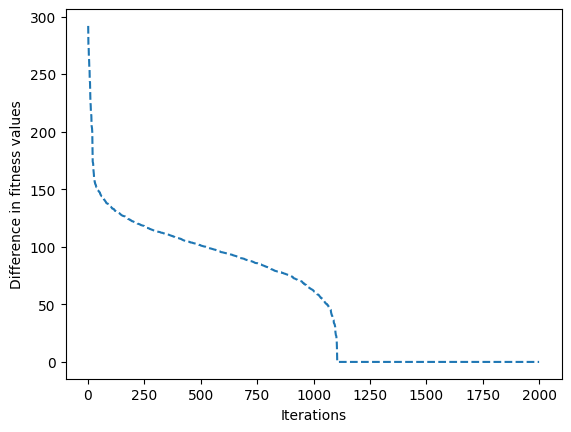

In [ ]:
y=[i+1 for i in range(2000)]
plt.xlabel("Iterations")
plt.ylabel("Difference in fitness values")
plt.plot(y, diff, label = "line 2", linestyle="--")

print(diff)